In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import scFates as scf
scv.set_figure_params(figsize=(3,3))
scf.set_figure_pubready()

In [5]:
adata=sc.read("data/adata_processed.h5ad")

adata_scenic=sc.read("data/adata_scenic.h5ad")

adata_velo=sc.read("data/adata_velo.h5ad")

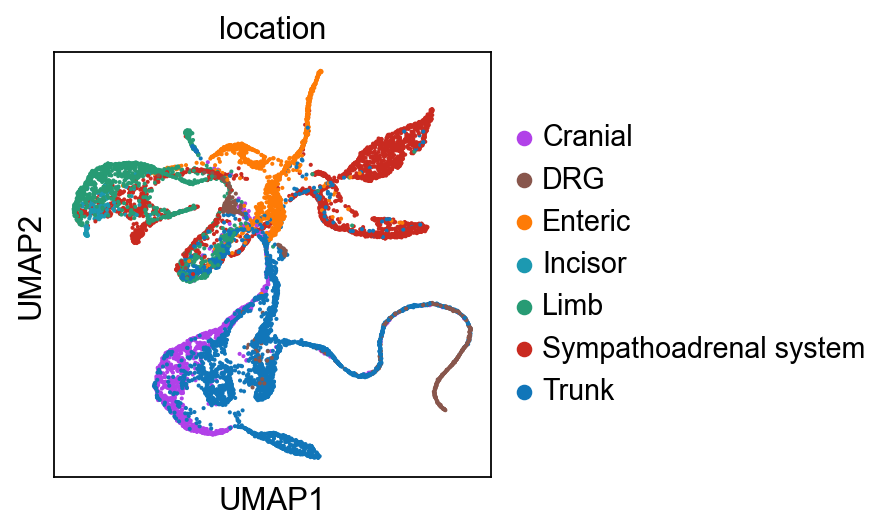

In [6]:
sc.pl.umap(adata_scenic,color="location")

In [8]:
scv.tl.score_genes_cell_cycle(adata_velo)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


<Figure size 960x240 with 0 Axes>

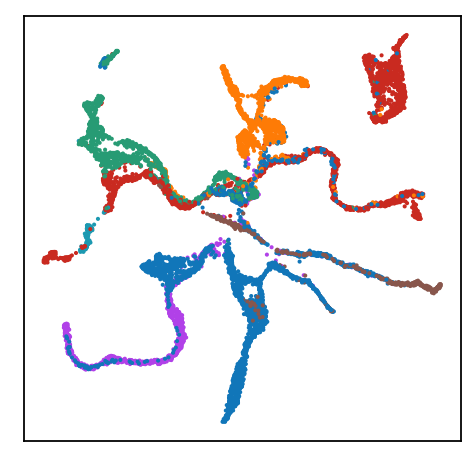

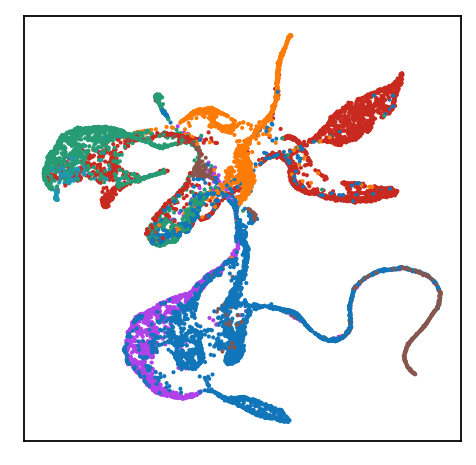

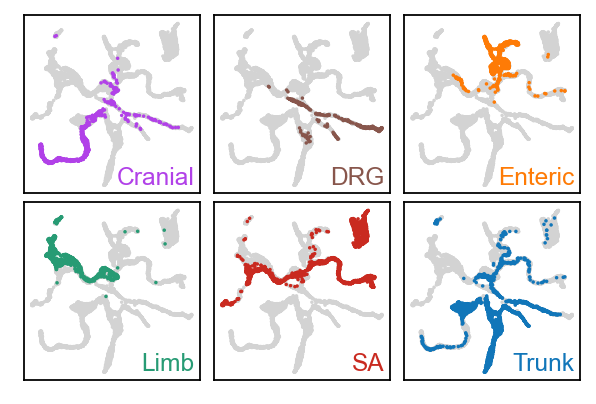

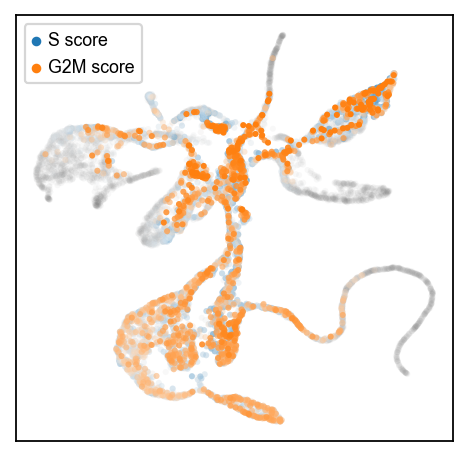

In [12]:
import matplotlib.gridspec as gridspec
import numpy as np
sc.set_figure_params(dpi_save=300,figsize=(3.5,3.5))
fig = plt.figure(figsize=(12,3))

ax=sc.pl.umap(adata,color="location",
           palette=["#B141E8","#88564C","#FE7B06","#1C99B1","#279B74","#C92A20","#1176B9"],
           legend_loc="none",title="",show=False)
ax.set_xlabel("")
ax.set_ylabel("")
plt.savefig("figures/figEV1-geneloc.pdf",dpi=300)
ax=sc.pl.umap(adata_scenic,color="location",
           palette=["#B141E8","#88564C","#FE7B06","#1C99B1","#279B74","#C92A20","#1176B9"],
           legend_loc="none",title="",show=False)

ax.set_xlabel("")
ax.set_ylabel("")
plt.savefig("figures/figEV1-scenicloc.pdf",dpi=300)

fig, axs=plt.subplots(2,3,gridspec_kw=dict(wspace=.05,hspace=0.05),figsize=(4.5,3))
axs=axs.ravel()
pal=np.array(adata.uns["location_colors"])[adata.obs.location.cat.categories!="Incisor"]

i=0
for ax,l in zip(axs,adata.obs.location.cat.categories[adata.obs.location.cat.categories!="Incisor"]):
    sc.pl.umap(adata,color="location",
           groups=[l],s=10,
           legend_loc="none",title="",show=False,ax=ax)
    ax.set(xlabel=None,ylabel=None,aspect="equal")
    l="SA" if l=='Sympathoadrenal system' else l
    ax.text(.97, 0.025,l,fontsize= 11,color=pal[i],
                va="bottom", ha="right", transform=ax.transAxes)
    i=i+1
plt.savefig("figures/figEV1-geneloc_split.pdf",dpi=300)


adata_velo.obsm=adata_scenic.obsm
ax=scv.pl.scatter(adata_velo, color_gradients=['S_score', 'G2M_score'],size=30,
                  smooth=True, perc=[5, 95],legend_loc="none",show=False,frameon=True)
ax.grid(False)
lgnd = plt.legend(loc=2,prop={'size': 8})
lgnd.legendHandles[0]._sizes=[11]
lgnd.legendHandles[1]._sizes=[11]


ax.set_xlabel("")
ax.set_ylabel("")
plt.savefig("figures/figEV1-scenicCC.pdf",dpi=300)

In [13]:
import subprocess
files=["figures/figEV1-geneloc.pdf","figures/figEV1-scenicloc.pdf",
       "figures/figEV1-geneloc_split.pdf","figures/figEV1-scenicCC.pdf"]


def get_ratio(file):
    command=('identify %s'%file).split()
    arr=np.array(subprocess.check_output(command).decode("utf-8").split(" ")[2].split("x"),dtype=int)
    return arr[0]/arr[1]

ratios=np.array([get_ratio(file) for file in files])
sum_ratios=ratios.sum()

In [14]:
ratios

array([1.02392344, 1.02392344, 1.47252747, 1.02427184])

In [15]:
a,b,c,d=(ratios/sum_ratios)-0.01

In [16]:
dev_pal=adata.uns["devtime_colors"]
from matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list("devtime",dev_pal)

adata_velo.obsm=adata.obsm

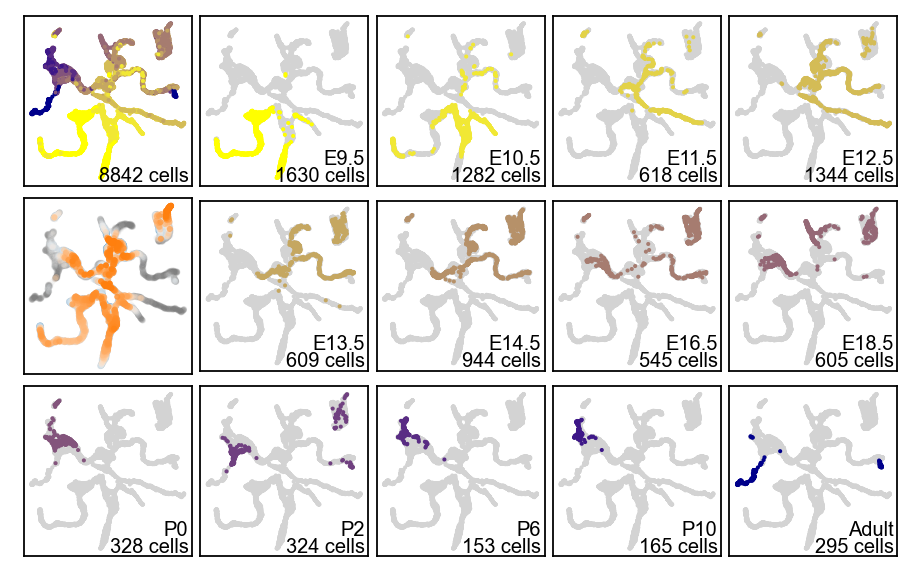

In [17]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
fig = plt.figure(figsize=(7,4.5))
idx_dev=np.arange(3*5)
idx_dev=idx_dev[~np.isin(idx_dev,[0,5])]
gs0 = gridspec.GridSpec(3, 5, figure=fig,wspace=.05,hspace=0.05)

ax = fig.add_subplot(gs0[5])
scv.pl.scatter(adata_velo, color_gradients=['S_score', 'G2M_score'],size=30,ax=ax,
                  smooth=True, perc=[5, 95],legend_loc="none",show=False,frameon=True)
ax.grid(False)
ax.set_xlabel("")
ax.set_ylabel("")
# ax.set_axis_off()

# ax.annotate('',
#             xy=(1, 1), xycoords='axes fraction',
#             xytext=(0, 1), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.001,width=1,headwidth=5),
#             horizontalalignment='right', verticalalignment='top')

# ax.text(.5, .9,"developmental\nprogression",fontsize= 9,
#         va="top", ha="center", transform=ax.transAxes)
# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size = '10%', pad = 0.1)
# fig.add_axes(cax)


# cb1 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,
#                                 orientation='horizontal'  ,                    
#                                 ticks=None
#                                 )
# cb1.set_ticks([])

ax = fig.add_subplot(gs0[0])
sc.pl.umap(adata,color="devtime",
           legend_loc="none",title="",show=False,ax=ax)

ax.set(xlabel=None,ylabel=None,aspect="equal")
ax.set_aspect("equal")
ax.text(.98, 0,"%s cells" %adata.obs.shape[0],fontsize= 9,
        va="bottom", ha="right", transform=ax.transAxes)

for i,d in enumerate(adata.obs.devtime.cat.categories):
    ax = fig.add_subplot(gs0[idx_dev[i]])
    sc.pl.umap(adata,color="devtime",groups=[d],
           legend_loc="none",title="",show=False,ax=ax)
    ax.set(xlabel=None,ylabel=None,aspect="equal")
    ax.text(.98, .1,d,fontsize= 9,
        va="bottom", ha="right", transform=ax.transAxes)
    ax.text(.98, .0,"%s cells" %(adata.obs.devtime==d).sum(),fontsize= 9,
        va="bottom", ha="right", transform=ax.transAxes)
plt.savefig('figures/figEV1_geneCCdevtime.pdf',bbox_inches="tight")

In [34]:
a,b,c,d=(ratios/sum_ratios)-0.01

In [35]:
fname= "figEV1"

In [42]:
%%bash -s $fname $a $b $c $d

echo $5

cat<<EOF >$1.tex
\documentclass[11pt]{article}
\usepackage[paperheight=217mm,paperwidth=180mm]{geometry}
 \geometry{
 left=5mm,
 right=5mm,
 top=5mm,
 bottom=5mm,
 }

\usepackage[labelfont=bf]{caption}

\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphicx} 
\begin{document}
\setmainfont{Arial}

\definecolor{Blue}{RGB}{50, 49, 145}

\noindent
\scriptsize 

\raggedright \textbf{A} \textcolor{Blue}{Workflow of single cell transcriptomic analysis of neural crest and Schwann cell lineages}
\includegraphics[width=.95\linewidth]{figures/suppfile1_3-A.pdf}  

\begin{minipage}[!ht]{$2\textwidth}
\includegraphics[width=1\textwidth]{figures/$1-geneloc.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{$3\textwidth}
\includegraphics[width=1\textwidth]{figures/$1-scenicloc.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{$4\textwidth}
\includegraphics[width=1\textwidth]{figures/$1-geneloc_split.pdf}
\end{minipage}\hfill
\begin{minipage}[!ht]{$5\textwidth}
\includegraphics[width=1\textwidth]{figures/$1-scenicCC.pdf}
\end{minipage}\hfill


\raggedright \textbf{A} \textcolor{Blue}{Workflow of single cell transcriptomic analysis of neural crest and Schwann cell lineages}
\includegraphics[width=1\linewidth]{figures/$1_geneCCdevtime.pdf} 


\clearpage


EOF

echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg

0.21537988612865447
This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./suppfig1.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def))
(/usr/

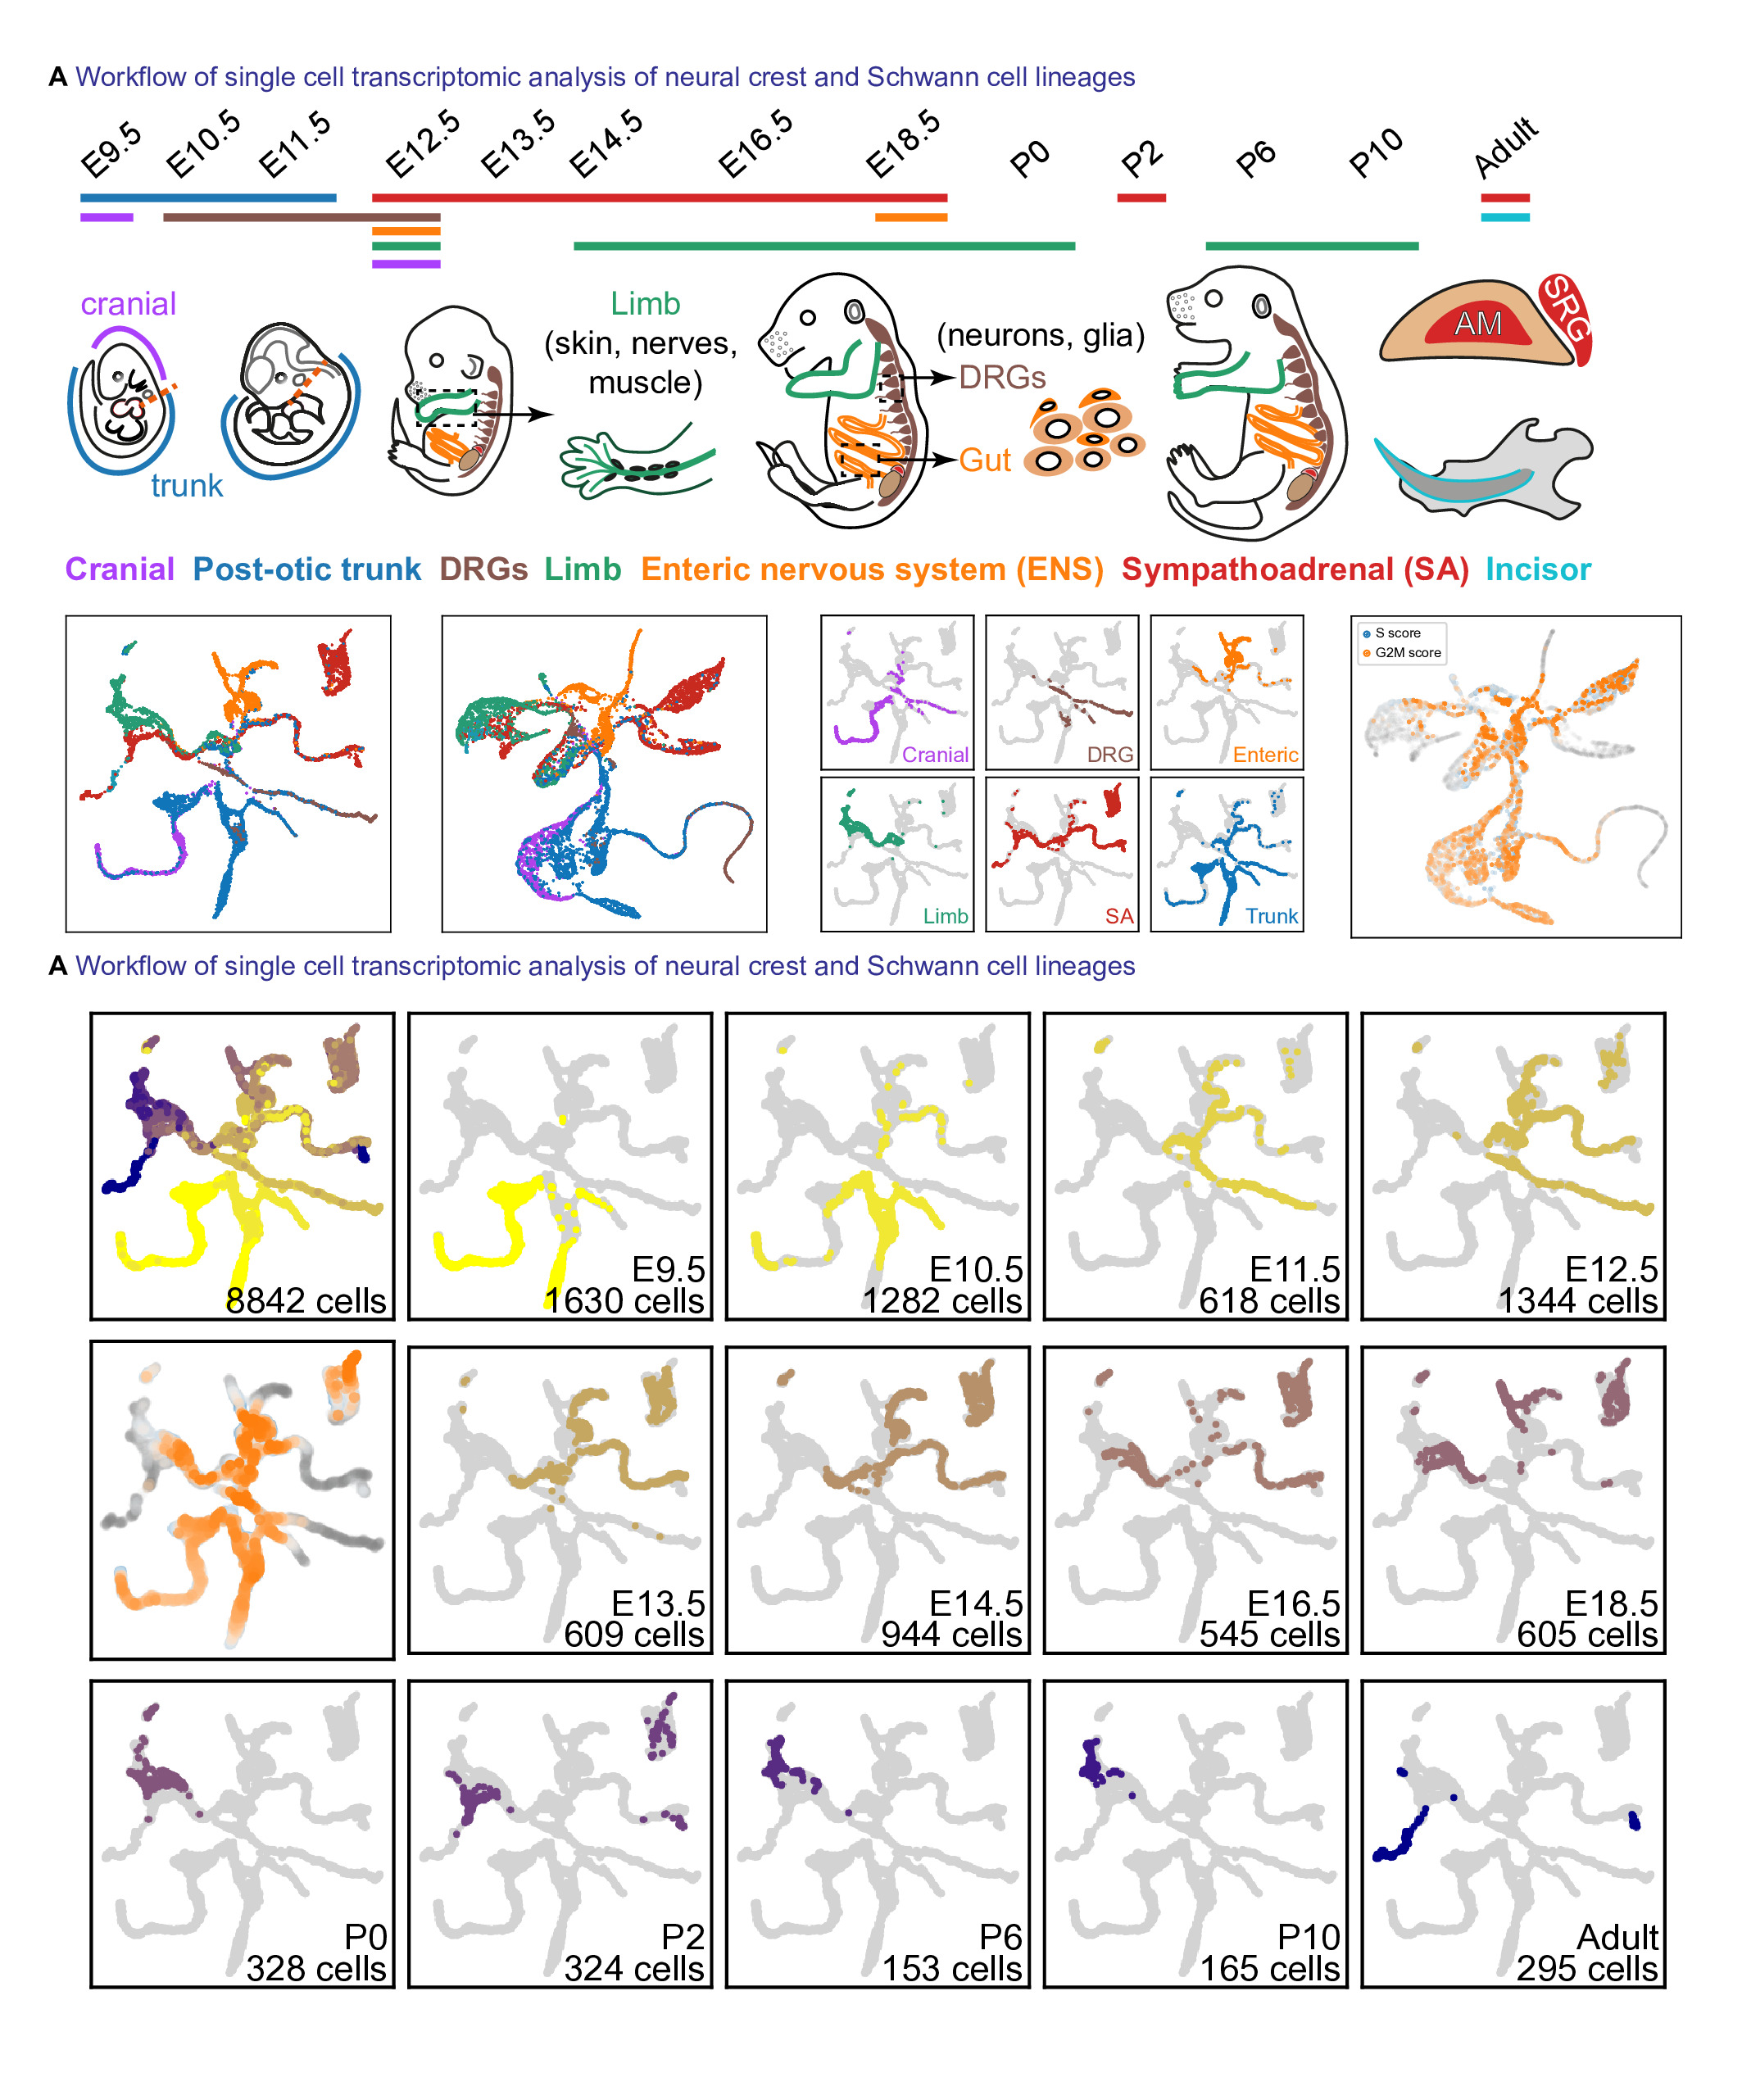

In [43]:
from IPython.display import Image
Image(filename=fname+'.jpg') 
